# Name : Samarth Deshpande

# Student ID : 8894058

# Step 1 : Frame the Problem

1) Define the objective in business terms:
The objective of the assignment is to establish a predictive relationship between BMI and diabetes progression one year after baseline.We are creating a model that can help identify risks in diabetes progression based on BMI.

2) How will your solution be used?
The solution could be used by healthcare sector  to check the risk of having diabetes by the person on the basis of the bmi.

3) What are the current solutions/workarounds (if any)?
Current solutions can be manual checking or there can be some model used currently.

4) How should you frame this problem (supervised/unsupervised, online/offline, etc.)?
This is a supervised learning problem as we have labeled data.

5) How should performance be measured?
Performance could be measured using Mean Squared Error (MSE) or R-squared.

6) Is the performance measure aligned with the business objective?
Yes, because accurately predicting diabetes based on BMI so that treatment can be started early.

7) What would be the minimum performance needed to reach the business objective?
MAE and MSE score should be low and Accuracy should be high.

8) What are comparable problems? Can you reuse experience or tools?
Comparable problems include predicting health problem such as cancer, etc.

9) Is human expertise available?
Currently this is a assignment so no human expertise available in healthcare sector.

10) How would you solve the problem manually?
As I dont have any experience in healtcare sector so It will be difficult for me to solve this question but will take help from healthcare professionals.

11) List the assumptions you or others have made so far. Verify assumptions if possible.
Assumptions may include the linearity of the relationship between BMI and diabetes progression.

# Importing packages 

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get the data

In [58]:
from sklearn import datasets
diabetes_X,diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

# Explore the data

In [59]:
diabetes_X.shape

(442, 10)

The shape of the independent data is 442 row and 10 columns

In [60]:
diabetes_y.shape

(442,)

To explore more, combining independent and dependent feture in one data frame 

In [62]:
diabetes = pd.DataFrame(diabetes_X,columns = ["age","sex","bmi","bp","s1","s2","s3","s4","s5","s6"])
diabetes["dis_prog"] = pd.DataFrame(diabetes_y)

Checking the data type using df.info

In [63]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       442 non-null    float64
 1   sex       442 non-null    float64
 2   bmi       442 non-null    float64
 3   bp        442 non-null    float64
 4   s1        442 non-null    float64
 5   s2        442 non-null    float64
 6   s3        442 non-null    float64
 7   s4        442 non-null    float64
 8   s5        442 non-null    float64
 9   s6        442 non-null    float64
 10  dis_prog  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


Now checking wether there are missing value in dataset.

In [65]:
diabetes.isna().sum()

age         0
sex         0
bmi         0
bp          0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
dis_prog    0
dtype: int64

As we can see there are no missing values.

Checking the Corelation between dependent and independent features

In [67]:
pd.DataFrame(diabetes[["dis_prog","age","sex","bmi","bp","s1","s2","s3","s4","s5","s6"]].corr()["dis_prog"])

,dis_prog
dis_prog,1.000000
age,0.187889
sex,0.043062
bmi,0.586450
bp,0.441482
s1,0.212022
s2,0.174054
s3,-0.394789
s4,0.430453
s5,0.565883


As we can see BMI has the highest corelation with dependent variable which is dis_prog. S3 which is high density lipoproteins shows negative corelation.

Checking the relationship between dependent and independent variable which are dis_progand BMI through scatter plot

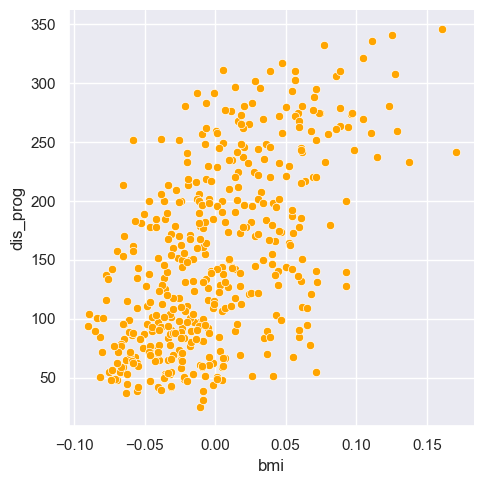

In [68]:
sns.relplot(data = diabetes, x = "bmi", y = "dis_prog",color = "orange")
sns.set(rc={'figure.figsize':(8,8)})

As we can see there is a linear relationship between BMI and dis_prog

C:\Users\HP\AppData\Local\Temp\ipykernel_15956\2393017413.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes["dis_prog"]) #visualisation of distribution of dependent variable


<Axes: xlabel='dis_prog', ylabel='Density'>

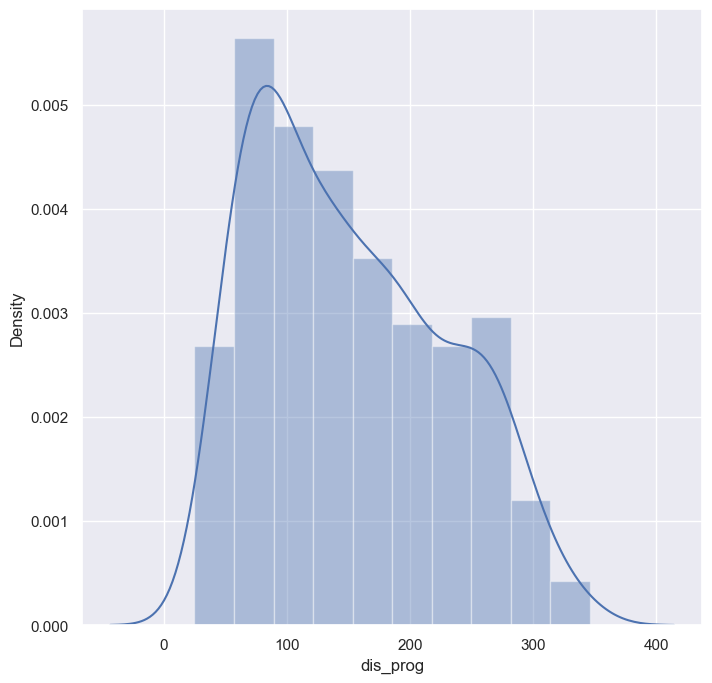

In [69]:
sns.distplot(diabetes["dis_prog"]) #visualisation of distribution of dependent variable

C:\Users\HP\AppData\Local\Temp\ipykernel_15956\3246262207.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes["bmi"]) #visualisation of distribution of independent variable


<Axes: xlabel='bmi', ylabel='Density'>

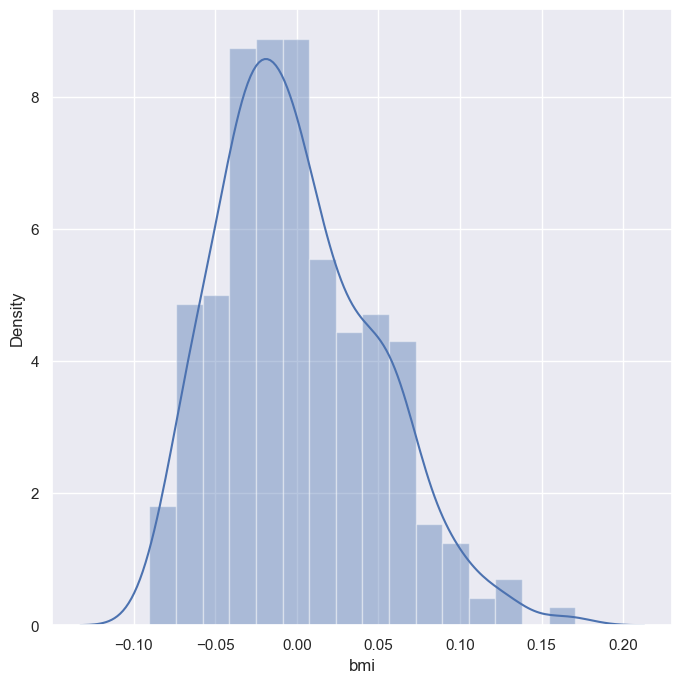

In [70]:
sns.distplot(diabetes["bmi"]) #visualisation of distribution of independent variable

# Prepare the data

Splitting the data in X and y. 

In [72]:
X = diabetes[["bmi"]] #Indepedent 
y = diabetes[["dis_prog"]] #dependent
X

,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385
...,...
437,0.019662
438,-0.015906
439,-0.015906
440,0.039062


In [73]:
y

,dis_prog
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


Spliting data in train and test

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

Finding the shape of Xtrain, Xtest,ytrain,ytest

Here data is divided into 80:20 ratio that is 80 for training and 20 for testing.

In [75]:
X_train.shape

(353, 1)

In [76]:
X_test.shape

(89, 1)

In [77]:
y_train.shape

(353, 1)

In [78]:
y_test.shape

(89, 1)

# Fine-Tune the System

In [79]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [80]:
print(f"The coefficient for the model is {model.coef_}")
print(f"The intercept of the model is {model.intercept_}")

The coefficient for the model is [[961.01654945]]
The intercept of the model is [152.85179458]


The coefficient is positive so this means as value of independent feature increases value of dependent feature also increases.
The value 151 of intercept means best fit line toches 151.81 on y-axis.

# Making predictions

In [81]:
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

Calculating loss function using Mean Square Error.

In [82]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
train_mse = mean_squared_error(y_train_pred,y_train)
test_mse = mean_squared_error(y_test_pred,y_test)

In [83]:
train_mse

3695.77351748141

In [84]:
test_mse

4666.6960003737395

# Plotting the regression line(prediction vs the actual) data points

Text(0, 0.5, 'dis_prog')

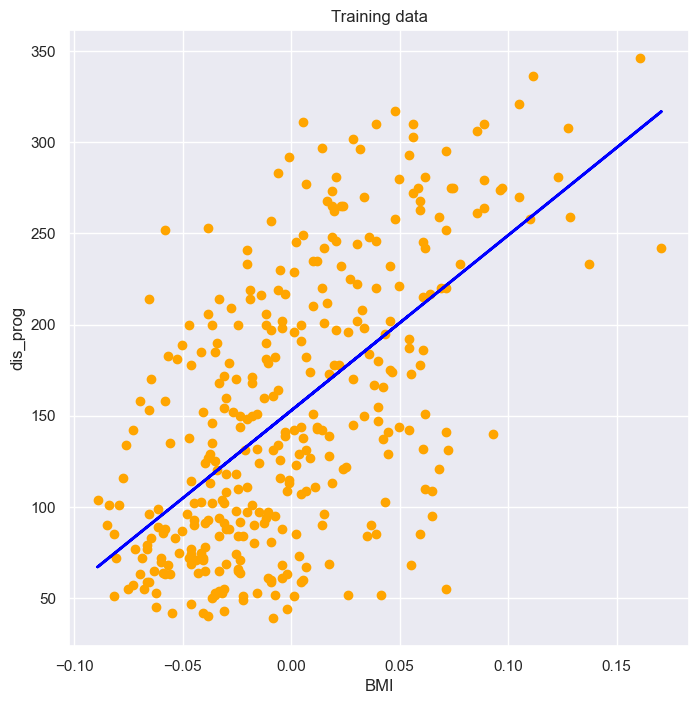

In [85]:
plt.scatter(X_train,y_train,color = 'orange',label = "Training_data")
plt.plot(X_train,y_train_pred,color = "blue",linewidth=2)
plt.title("Training data")
plt.xlabel('BMI')
plt.ylabel('dis_prog')

Text(0, 0.5, 'dis_prog')

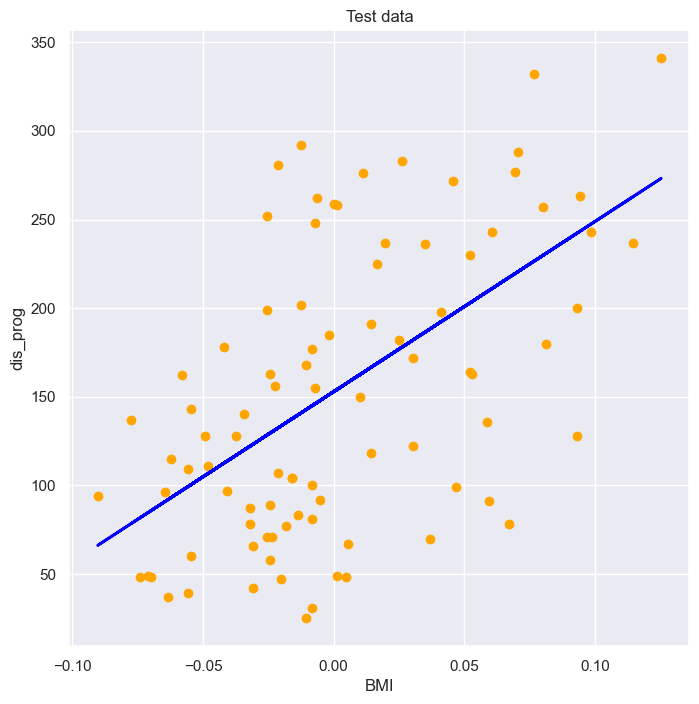

In [86]:
plt.scatter(X_test,y_test,color = 'orange',label = "Training_data")
plt.plot(X_test,y_test_pred,color = "blue",linewidth=2)
plt.title("Test data")
plt.xlabel('BMI')
plt.ylabel('dis_prog')

# Calculate r2 value a statistical measure to see how well the regression line is close to the actual data.

In [87]:
print("Check score for test set")
print(f"R2 Score:{r2_score(y_test,y_test_pred)}")
print(f"MAE:{mean_absolute_error(y_test,y_test_pred)}")
print(f"MSE:{mean_squared_error(y_test,y_test_pred)}")

Check score for test set
R2 Score:0.29162461688006536
MAE:57.49405274219002
MSE:4666.6960003737395


# Outcomes

This regression model uses BMI as the independent feature and disease progression (dis_prog) as the dependent feature. The Mean Squared Error (MSE), Mean Absolute Error(MSE)  are high because there is only one predictor (independent feature)it makes the model incompetent to make prediction as there are no other estimators. By adding more feature we can reduce mse and mae score and also increase accuracy.